# HIV Kinda Sucks
By: Michael Remley

Patent Pending

In [421]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *


from matplotlib.pyplot import twinx

In [422]:
def make_system(params,t_0,t_end,t_step):
    """Make a system object for the RLEV model.
    
    Γ,μ,τ,β,ρ,α,σ,δ,π = see Table in paper
    
    returns: System object
    """
    init = State(R=200,L=0,E=0,V=4e-7)
    
    Γ,μ,τ,β,ρ,α,σ,δ,π = params / (1440 / t_step)
    t0 = t_0
    t_end = t_end * (1440 / t_step)

    return System( Γ=Γ, μ=μ, τ=τ, β=β, ρ=ρ, α=α, σ=σ, δ=δ, π=π, 
                  t0=t0, t_end=t_end,init=init)

In [423]:
def update_func(state,t,system):
    """Update the RLEV model.
    
    state: State (R,L,E,V)
    t: time
    system: System object
    
    returns: State (sir)
    """
    r,l,e,v = state
    Γ,μ,τ,β,ρ,α,σ,δ,π,t_0,t_end,init = system
    
    dRdt = Γ*τ - μ*r - β*r*v
    dLdt = ρ*β*r*v - μ*l - α*l
    dEdt = (1.0 - ρ)*β*r*v + α*l - δ*e
    dVdt = π*e - σ*v
    
    r += dRdt
    l += dLdt
    e += dEdt
    v += dVdt
    
    return State(R=r, L=l, E=e, V=v)



In [424]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=system.init.index)
    frame.row[t0] = system.init
    
    for t in linrange(system.t0, system.t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    frame.index /= 18
    return frame

In [425]:
params = Params(Γ = 1.36,
                μ = 1.36e-3,    
                τ = 0.2,        
                β = 0.00027,    
                ρ = 0.1,        
                α = 3.6e-2, 
                σ = 2,  
                δ = 0.33,   
                π = 100)
system = make_system(params,0,120,80)
results = run_simulation(system, update_func);


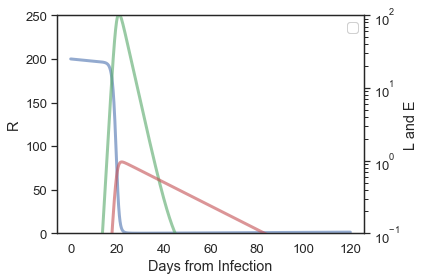

In [426]:
plot(results.R)
decorate(ylabel = "R",
        ybound = (0,250),
        xlabel = "Days from Infection")
twinx()
plot(results.E,"g")
plot(results.L,"r")
decorate(ylabel = "L and E",
         yscale = "log",
         ybound = (0.1,100)
        )

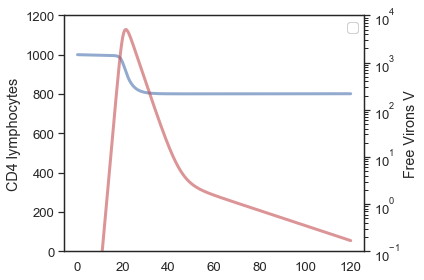

In [427]:
totallyms = TimeSeries()
totallyms = 1000*(1-0.2)+results.R + results.L + results.E 
plot(totallyms)
decorate(ybound = (0,1200),
         ylabel = "CD4 lymphocytes")
twinx()
plot(results.V, "r")
decorate(ylabel = "Free Virons V",
        yscale = "log",
         ybound = (0.1,1e4)
        )

In [428]:
system * 18

Γ                                                     1.36
μ                                                  0.00136
τ                                                      0.2
β                                                  0.00027
ρ                                                      0.1
α                                                    0.036
σ                                                        2
δ                                                     0.33
π                                                      100
t0                                                       0
t_end                                                38880
init     R    3600.000000
L       0.000000
E       0.00...
dtype: object